# Cars Dataset manipulation project

## Part 1 : Data Cleaning

**1. import the necessary modules :**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
import missingno as msno #Missing data visualization module for Python
import datetime as dt
import warnings

**2. display our dataset to identify cleaning problems :**

In [78]:
cars_data = pd.read_csv("wandaloo_cars.csv")

In [79]:
cars_data

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,MERCEDES,Classe C 2014,220 d,228.000 DH,2014.0,Seconde,144.500 km,Diesel,Automatique,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
1,MERCEDES,Classe C 2003,220 CDI,79.000 DH,2003.0,Seconde,350.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCEDES,Classe B 2013,180 d Urban,150.000 DH,2013.0,Seconde,144.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
3,MERCEDES,Classe E 2006,Autre version,135.000 DH,2006.0,Seconde,248.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
4,MERCEDES,CLA Coupé 2014,220 CDI,240.000 DH,2014.0,Seconde,103.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,VOLVO,XC90,NaN,630.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,8 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,"6,3 l/100 km","5,4 l/100 km",220 km/h,71 litre
3125,VOLVO,XC90,NaN,730.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,8 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,"6,3 l/100 km","5,4 l/100 km",220 km/h,71 litre
3126,VOLVO,XC90,NaN,850.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,8 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,"6,3 l/100 km","5,4 l/100 km",220 km/h,71 litre
3127,VOLVO,XC90,NaN,1.000.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,11 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,- l/100 km,- l/100 km,230 km/h,71 litre


**3**. **Detected problems**

by simply examining the data, we can already diagnose a series of problems on all lines, such as:

* ***Problem-1***: The first problem concerns the attribute 'price', which must be expressed as a decimal number, but we can clearely see that that's not the case. So the character strings "DH Public price" and "DH" must be deleted.
* ***Problem-2***: The third issue concerns the attribute 'Kilométrage', which must be expressed as a decimal number (float) and the character string "km" must be removed.
* ***Problem-3***: The fourth problem concerns the attribute 'Puissance Fiscale', which must be expressed as an integer (integer) and the character string "cv" must be removed.
* ***Problem-4***: There are some columns containing null values. 


**To check for these issues, we'll look at the type of each column**

In [4]:
cars_data.dtypes

Brand                                    object
Model                                    object
Version                                  object
Price                                    object
Modèle                                  float64
Main                                     object
Kilométrage                              object
Carburant                                object
Transmision                              object
Puissance fiscale                        object
Couleur extérieure                       object
Etat du véhicule                         object
Climatisation                            object
Vitres électriques                       object
Sièges électriques                       object
Ordinateur de bord                       object
Start & Stop                             object
Régulateur de vitesse                    object
Allumage auto. des feux                  object
Détecteur de pluie                       object
Commandes au volant                     

**Let's take a look at the information about each column**

In [5]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Brand                                 3063 non-null   object 
 1   Model                                 3063 non-null   object 
 2   Version                               2180 non-null   object 
 3   Price                                 3063 non-null   object 
 4   Modèle                                2180 non-null   float64
 5   Main                                  2180 non-null   object 
 6   Kilométrage                           2180 non-null   object 
 7   Carburant                             2166 non-null   object 
 8   Transmision                           2180 non-null   object 
 9   Puissance fiscale                     3048 non-null   object 
 10  Couleur extérieure                    2180 non-null   object 
 11  Etat du véhicule 

In [6]:
# getting the number of missing values 
cars_data.isna().sum()

Brand                                     66
Model                                     66
Version                                  949
Price                                     66
Modèle                                   949
Main                                     949
Kilométrage                              949
Carburant                                963
Transmision                              949
Puissance fiscale                         81
Couleur extérieure                       949
Etat du véhicule                         949
Climatisation                             81
Vitres électriques                        81
Sièges électriques                       101
Ordinateur de bord                        81
Start & Stop                              81
Régulateur de vitesse                     81
Allumage auto. des feux                   81
Détecteur de pluie                        81
Commandes au volant                       81
Ecran tactile                             81
Rétroviseu

**Now we can detect an other problem :**
* ***Problem-6***: There are whole lines that are empty that need to be deleted. 

The problem of missing value is worst than we thought, in some columns the number of missing value are greater than 50%. 

## Let's start cleaning our Data

### We are going to start by deleting the empty lines then converting columns containing numeric values to float : Price , puissance fiscale , Kilométrage, Architecture, Cylindrée ...


**I-** **Deleting the empty and duplicated lines**

In [81]:
# supprimant les lignes vides
cars_data.dropna(how='all',inplace=True)
# supprimant les ligne dupliquées
cars_data.drop_duplicates(inplace=True)

*we will display all the values that any column can contain :* <br>

In [82]:
for x in cars_data.columns:
    print ("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print (x)
    print ("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    if cars_data[x].dtype== object :
        cars_data[x] = cars_data[x].str.strip()
    print (cars_data[x].unique())
    print ("\n\n")

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Brand
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
['MERCEDES' 'MINI' 'MITSUBISHI' 'NISSAN' 'OPEL' 'PEUGEOT' 'PORSCHE'
 'RENAULT' 'SEAT' 'SKODA' 'SSANGYONG' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN'
 'VOLVO' 'ALFA' 'AUDI' 'BMW' 'CITROEN' 'DACIA' 'DFSK' 'DS' 'FIAT' 'FORD'
 'HONDA' 'HYUNDAI' 'JAGUAR' 'JEEP' 'KIA' 'LAND' 'LEXUS' 'MAHINDRA' 'MAZDA']



%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Model
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
['Classe C 2014' 'Classe C 2003' 'Classe B 2013' ... 'XC40' 'XC60' 'XC90']



%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Version
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
['220 d' '220 CDI' '180 d Urban' 'Autre version'
 '250 CDI BlueEfficiency Classic' '220 d DCT Luxury' '200 d Avantgarde +'
 '200 d Urban' '200 CDI' '220 CDI Bluetec Exclusive' '250 d 4MATIC Luxury'
 '63 AMG' '280 Coupé Elegance' '220 d DCT AMG line'
 '220 d 4MATIC AMG line' '200 Kompressor' '160 d DCT Style'
 '220 d AMG line' '180 d BVA Urban' '180 d' '350 d DCT'
 '220 CDI BlueEfficiency Classic' '180 CDI Pack S

**II-** **converting columns containing numeric values to float**

**1-** **Convert 'Price' to float number.**

*To do this we will display all the values that the Price column can contain to remove them:* <br>
    **N.B:** *the column 'Price' contains an extra problem: every three digits are separated by a dot*

In [9]:
cars_data['Price'].unique()

array(['228.000 DH', '79.000 DH', '150.000 DH', ...,
       '730.000 DH *   * Prix public', '1.000.000 DH *   * Prix public',
       '1.100.000 DH *   * Prix public'], dtype=object)

In [10]:
cars_data['Price'] = cars_data['Price'].str.strip("DH")
cars_data['Price'] = cars_data['Price'].str.strip("DH *   * Prix public")
cars_data['Price'] = cars_data['Price'].str.strip("DH VENDUE")
cars_data['Price'] = cars_data['Price'].str.strip("DH * promo")
cars_data['Price'] = cars_data['Price'].str.replace(".","")
cars_data['Price'] = cars_data['Price'].astype('float')
cars_data = cars_data.rename(columns={'Price': 'Price (en DH)'})

C:\Users\hp\AppData\Local\Temp\ipykernel_27576\3069196033.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cars_data['Price'] = cars_data['Price'].str.replace(".","")


##### To make our data clearer, we are going to rename the label of each cleaned column and adding the unity.  

**2-** **Convert 'Kilométrage' to float number.**

In [11]:
cars_data['Kilométrage'] = cars_data['Kilométrage'].str.strip("km")
cars_data['Kilométrage'] = cars_data['Kilométrage'].str.replace(".","")
cars_data['Kilométrage'] = cars_data['Kilométrage'].astype(float)
cars_data = cars_data.rename(columns={'Kilométrage': 'Kilométrage (en km)'})

C:\Users\hp\AppData\Local\Temp\ipykernel_27576\472453478.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cars_data['Kilométrage'] = cars_data['Kilométrage'].str.replace(".","")


**3-** **Convert 'puissance fiscale' to float number.**

In [13]:
cars_data['Puissance fiscale'] = cars_data['Puissance fiscale'].str.split(" ", expand = True)[0]
cars_data['Puissance fiscale'] = cars_data['Puissance fiscale'].replace('', None)
cars_data['Puissance fiscale'] = cars_data['Puissance fiscale'].str.strip("cv")
cars_data['Puissance fiscale'] = cars_data['Puissance fiscale'].str.strip("-")
cars_data['Puissance fiscale'] = cars_data['Puissance fiscale'].astype(float)
cars_data = cars_data.rename(columns={'Puissance fiscale': 'Puissance fiscale (en cv)'})

**4-** **Doing to same thing with remaining numeric features.**

**a-** **Architecture**

In [14]:
cars_data['Architecture'] = cars_data['Architecture'].str.replace("cylindres","")
cars_data['Architecture'] = cars_data['Architecture'].str.replace("en ligne","")
cars_data['Architecture'] = cars_data['Architecture'].str.replace("en V","")
cars_data['Architecture'] = cars_data['Architecture'].str.replace("à plat","")
cars_data['Architecture'] = cars_data['Architecture'].astype(float)
cars_data = cars_data.rename(columns={'Architecture': 'Architecture (par cylindres)'})

**b-** **Cylindrée**

In [15]:
cars_data['Cylindrée'] = cars_data['Cylindrée'].str.replace("cm³","")
cars_data['Cylindrée'] = cars_data['Cylindrée'].str.replace(".","")
cars_data['Cylindrée'] = cars_data['Cylindrée'].astype(float)
cars_data = cars_data.rename(columns={'Cylindrée': 'Cylindrée (en cm³)'})

C:\Users\hp\AppData\Local\Temp\ipykernel_27576\2499969016.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cars_data['Cylindrée'] = cars_data['Cylindrée'].str.replace(".","")


**c-** **Conso. ville**

In [16]:
cars_data['Conso. ville'] = cars_data['Conso. ville'].str.replace("l/100 km","")
cars_data['Conso. ville'] = cars_data['Conso. ville'].str.replace(",",".")
cars_data['Conso. ville'] = cars_data['Conso. ville'].replace("- ", None)
cars_data['Conso. ville'] = cars_data['Conso. ville'].replace("", None)
cars_data['Conso. ville'] = cars_data['Conso. ville'].astype(float)
cars_data = cars_data.rename(columns={'Conso. ville': 'Conso. ville (en l/100 km)'})

**d-** **Conso. route**

In [17]:
cars_data['Conso. route'] = cars_data['Conso. route'].str.replace("l/100 km","")
cars_data['Conso. route'] = cars_data['Conso. route'].str.replace(",",".")
cars_data['Conso. route'] = cars_data['Conso. route'].replace("- ", None)
cars_data['Conso. route'] = cars_data['Conso. route'].replace("", None)
cars_data['Conso. route'] = cars_data['Conso. route'].astype(float)
cars_data = cars_data.rename(columns={'Conso. route': 'Conso. route (en l/100 km)'})

**e-** **Vitesse maxi.**

In [18]:
cars_data['Vitesse maxi.'] = cars_data['Vitesse maxi.'].str.strip("km/h")
cars_data['Vitesse maxi.'] = cars_data['Vitesse maxi.'].str.strip("- ")
cars_data['Vitesse maxi.'] = cars_data['Vitesse maxi.'].replace("", np.nan)
cars_data['Vitesse maxi.'] = cars_data['Vitesse maxi.'].astype(float)
cars_data = cars_data.rename(columns={'Vitesse maxi.': 'Vitesse maxi. (en km/h)'})

**f-** **Volume du réservoir**

In [19]:
cars_data['Volume du réservoir'] = cars_data['Volume du réservoir'].str.strip(" litre")
cars_data['Volume du réservoir'] = cars_data['Volume du réservoir'].str.strip("-")
cars_data['Volume du réservoir'] = cars_data['Volume du réservoir'].replace('',np.nan)
cars_data['Volume du réservoir'] = cars_data['Volume du réservoir'].astype(float)
cars_data = cars_data.rename(columns={'Volume du réservoir': 'Volume du réservoir (en litre)'})

In [20]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 3128
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Brand                                 3040 non-null   object 
 1   Model                                 3040 non-null   object 
 2   Version                               2176 non-null   object 
 3   Price (en DH)                         3040 non-null   float64
 4   Modèle                                2176 non-null   float64
 5   Main                                  2176 non-null   object 
 6   Kilométrage (en km)                   2176 non-null   float64
 7   Carburant                             2162 non-null   object 
 8   Transmision                           2176 non-null   object 
 9   Puissance fiscale (en cv)             2723 non-null   float64
 10  Couleur extérieure                    2176 non-null   object 
 11  Etat du véhicule 

## Dealing with missing value

***The display of empty lines***

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

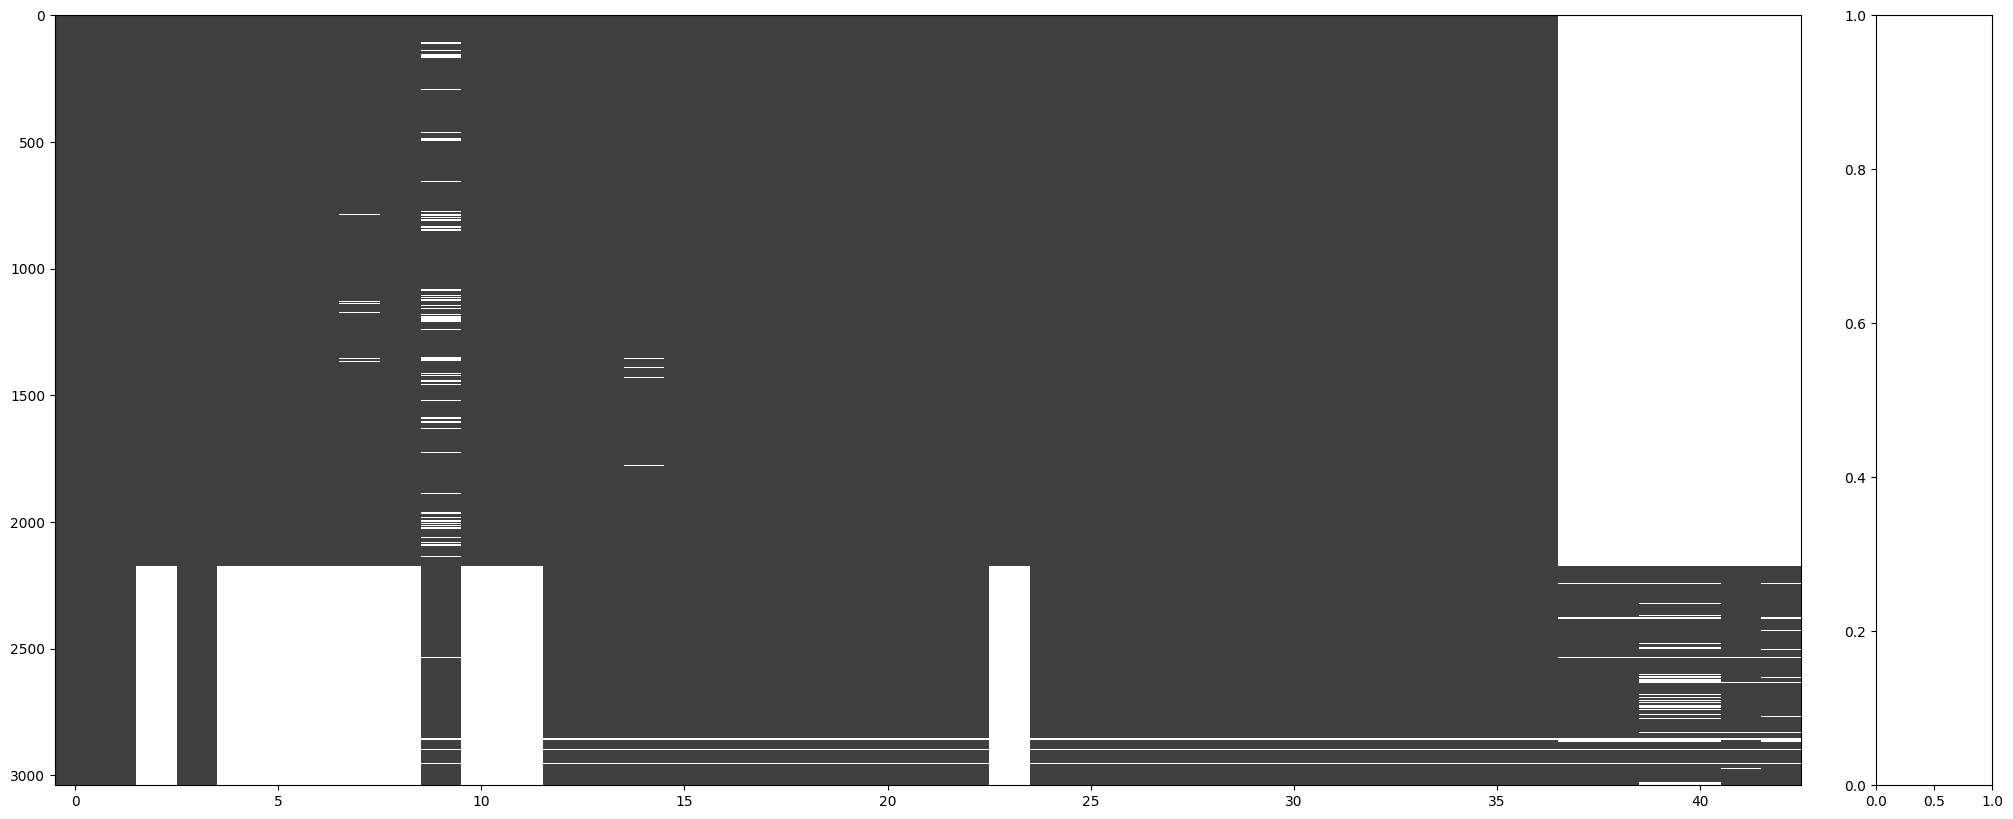

In [21]:
msno.matrix(cars_data)
plt.show()

**Before starting our process of completion, we can notice that there is 6 columns with more than 75% of NaN values**

**So we are going to delete these features because of the difficulty to deal with it otherwise**

In [22]:
columns_to_drop = cars_data.columns[cars_data.isna().sum()>(0.70*len(cars_data))]
cars_data.drop(columns_to_drop, axis = 1, inplace = True)

## Analysis and completion of this data

**First of all, we can see that some features has the same number of missing value**

**We have the four features: Kilométrage, Modèle, Main and Etat du véhicule has the same number of missing values**

**We can interpret that by being new cars**

**To solve that, we can fill these NaN values by : '0' in 'Kilométrage', '2022' in 'Modèle' 'Neuve' in "Main" and "Etat du véhicule"**

**N.B:** *The **Main** attribute represents usage, by how many person the car was used ?* 

In [23]:
cars_data['Kilométrage (en km)'] = cars_data['Kilométrage (en km)'].fillna(0)
cars_data['Modèle'] = cars_data['Modèle'].fillna(2022)
cars_data.Main.fillna("Neuve", inplace=True)
cars_data['Etat du véhicule'] = cars_data['Etat du véhicule'].fillna("Neuve")

**Now after filling missing value in "Modèle", we can chane the type of this column to an int**

In [24]:
cars_data['Modèle'] = cars_data['Modèle'].astype(int)

**Anoter problem in the feature 'Etat du véhicule' is te value '-'.**

**To deal with it, we can change it to 'Bon'.**

In [25]:
cars_data['Etat du véhicule'] = cars_data['Etat du véhicule'].str.replace("-","Bon")

*Manage attribute functionality (**Version**).*

In [26]:
cars_data['Version'].value_counts()

Autre version                  372
1.7 CDTi Cosmo                  32
1.5 dCi Authentique             27
220 CDI                         24
1.6 HDi Active                  16
                              ... 
1.6 dCi L2H1                     1
1.5 dCi Exception                1
1.5 dCi Privilege                1
1.5 dCi Storm                    1
2.0 D4 190 Momentum Confort      1
Name: Version, Length: 733, dtype: int64

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cars_data['Version'] = imputer.fit_transform(cars_data['Version'].to_numpy().reshape(-1,1))

*Manage attribute functionality (**Couleur extérieure**).*

In [28]:
cars_data['Couleur extérieure'].value_counts()

Noir             617
Blanc            279
Gris foncé       224
Gris             221
-                217
Gris clair       155
Bleu foncé        87
Autre couleur     67
Marron            50
Bleu              49
Rouge             47
Beige             31
Blanc cassé       24
Bleu ciel         23
Bordeau           21
Marron clair      17
Vert foncé        13
Jaune d'or        10
Violet             9
Vert               9
Orange             2
Jaune              2
Rose               2
Name: Couleur extérieure, dtype: int64

In [29]:
cars_data['Couleur extérieure'] = cars_data['Couleur extérieure'].fillna("Autre")
cars_data['Couleur extérieure'] = cars_data['Couleur extérieure'].str.replace("-", "Autre")

In [30]:
cars_data['Couleur extérieure'].value_counts()

Autre            1081
Noir              617
Blanc             279
Gris foncé        224
Gris              221
Gris clair        155
Bleu foncé         87
Autre couleur      67
Marron             50
Bleu               49
Rouge              47
Beige              31
Blanc cassé        24
Bleu ciel          23
Bordeau            21
Marron clair       17
Vert foncé         13
Jaune d'or         10
Violet              9
Vert                9
Orange              2
Jaune               2
Rose                2
Name: Couleur extérieure, dtype: int64

*Manage attribute functionality (**Ouverture auto. du coffre**).*

**Since we find that this attribute is not important, we can remove it.**

In [31]:
cars_data.drop('Ouverture auto. du coffre', axis = 1, inplace = True)

In [32]:
cars_data.isna().sum()

Brand                                     0
Model                                     0
Version                                   0
Price (en DH)                             0
Modèle                                    0
Main                                      0
Kilométrage (en km)                       0
Carburant                               878
Transmision                             864
Puissance fiscale (en cv)               317
Couleur extérieure                        0
Etat du véhicule                          0
Climatisation                            15
Vitres électriques                       15
Sièges électriques                       35
Ordinateur de bord                       15
Start & Stop                             15
Régulateur de vitesse                    15
Allumage auto. des feux                  15
Détecteur de pluie                       15
Commandes au volant                      15
Ecran tactile                            15
Rétroviseurs électriques        

*Manage attribute functionality **(Carburant)**.*

In [33]:
cars_data['Carburant'].value_counts()

Diesel        1898
Essence        256
Hybride          7
Electrique       1
Name: Carburant, dtype: int64

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cars_data['Carburant'] = imputer.fit_transform(cars_data['Carburant'].to_numpy().reshape(-1,1))

*Manage attribute functionality **(Transmission)**.*

In [35]:
cars_data['Transmision'].value_counts()

Manuelle       1145
Automatique    1031
Name: Transmision, dtype: int64

*These feature is hard to deal with it, because it's an important feature so we can not delete it. And also we can not fill the missing value by the most frequent because the value are almost the same*

**So we can try an other solution. This solution is to fill the missing values with 'À déterminer'**

In [36]:
cars_data['Transmision'] = cars_data['Transmision'].fillna("À déterminer")

**The missing values in the rest of the features will be filled by the most frequent values**

In [37]:
cars_data = cars_data.fillna(cars_data.mode().iloc[0])

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

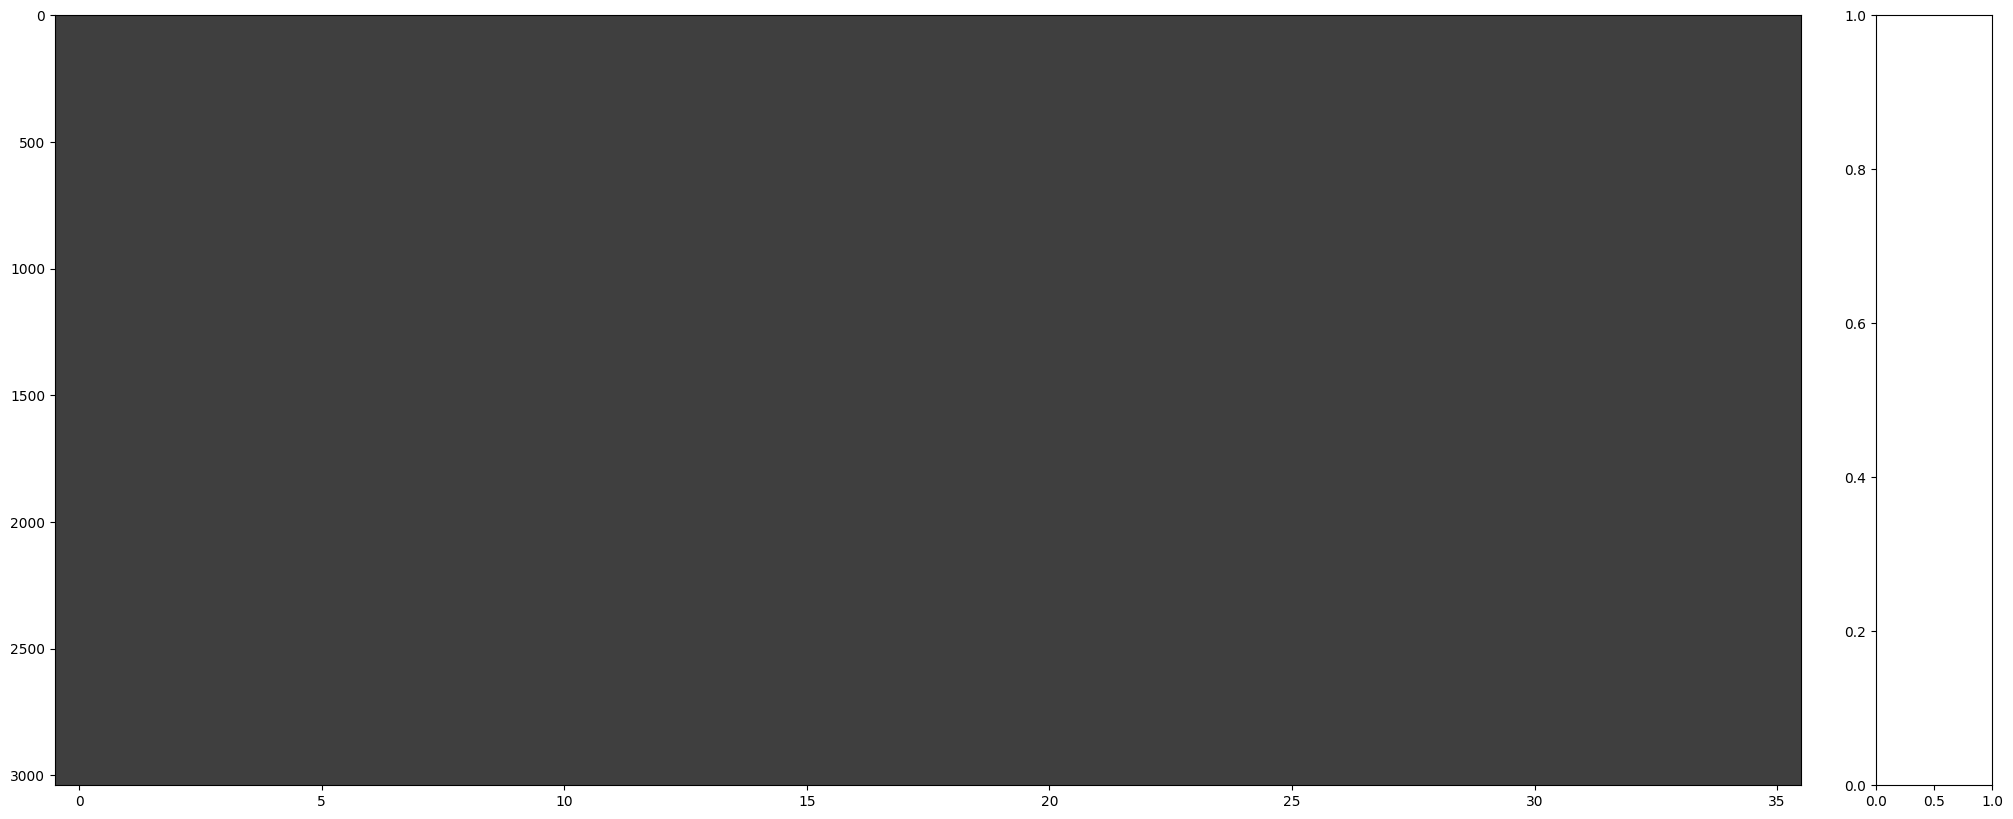

In [38]:
msno.matrix(cars_data)
plt.show()

In [ ]:
sns.heatmap(cars_data.isnull(), yticklabels=False)

In [39]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 3128
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Brand                                 3040 non-null   object 
 1   Model                                 3040 non-null   object 
 2   Version                               3040 non-null   object 
 3   Price (en DH)                         3040 non-null   float64
 4   Modèle                                3040 non-null   int32  
 5   Main                                  3040 non-null   object 
 6   Kilométrage (en km)                   3040 non-null   float64
 7   Carburant                             3040 non-null   object 
 8   Transmision                           3040 non-null   object 
 9   Puissance fiscale (en cv)             3040 non-null   float64
 10  Couleur extérieure                    3040 non-null   object 
 11  Etat du véhicule 

In [40]:
cars_data.to_csv('cleaned_data.csv', index=False)

### Part 2: Data visualization and exploration.

#### `Analyse générale du jeu de données`

In [41]:
cars_data

,Brand,Model,Version,Price (en DH),Modèle,Main,Kilométrage (en km),Carburant,Transmision,Puissance fiscale (en cv),...,Bluetooth,Jantes aluminium,Volant cuir,Feux de jour,Barres de toit,Toit,Airbags,ABS,ESP,Antipatinage
0,MERCEDES,Classe C 2014,220 d,228000.0,2014,Seconde,144500.0,Diesel,Automatique,8.0,...,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui
1,MERCEDES,Classe C 2003,220 CDI,79000.0,2003,Seconde,350000.0,Diesel,Manuelle,8.0,...,oui,oui,non,oui,non,Rigide,oui,oui,oui,oui
2,MERCEDES,Classe B 2013,180 d Urban,150000.0,2013,Seconde,144000.0,Diesel,Manuelle,8.0,...,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui
3,MERCEDES,Classe E 2006,Autre version,135000.0,2006,Seconde,248000.0,Diesel,Automatique,9.0,...,oui,oui,non,oui,oui,Rigide,oui,oui,oui,oui
4,MERCEDES,CLA Coupé 2014,220 CDI,240000.0,2014,Seconde,103000.0,Diesel,Automatique,9.0,...,oui,oui,non,oui,non,Panoramique,oui,oui,oui,oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,VOLVO,XC90,Autre version,630000.0,2022,Neuve,0.0,Diesel,À déterminer,8.0,...,oui,19 pouces,oui,oui,oui,Rigide,7.0,oui,oui,oui
3125,VOLVO,XC90,Autre version,730000.0,2022,Neuve,0.0,Diesel,À déterminer,8.0,...,oui,20 pouces,oui,oui,oui,Panoramique ouvrant,7.0,oui,oui,oui
3126,VOLVO,XC90,Autre version,850000.0,2022,Neuve,0.0,Diesel,À déterminer,8.0,...,oui,20 pouces,oui,oui,oui,Panoramique ouvrant,7.0,oui,oui,oui
3127,VOLVO,XC90,Autre version,1000000.0,2022,Neuve,0.0,Diesel,À déterminer,11.0,...,oui,20 pouces,oui,oui,oui,Panoramique ouvrant,7.0,oui,oui,oui


In [42]:
cars_data.describe() 

,Price (en DH),Modèle,Kilométrage (en km),Puissance fiscale (en cv)
count,3.040000e+03,3040.000000,3.040000e+03,3040.000000
mean,2.669919e+05,2014.846382,1.065065e+05,8.047697
std,5.127412e+05,6.421707,3.397430e+05,4.649975
min,0.000000e+00,1984.000000,0.000000e+00,1.000000
25%,9.500000e+04,2011.000000,0.000000e+00,6.000000
50%,1.450000e+05,2015.000000,7.960000e+04,7.000000
75%,2.750000e+05,2022.000000,1.550000e+05,8.000000
max,2.200000e+07,2022.000000,1.678000e+07,95.000000


#### Histogram 

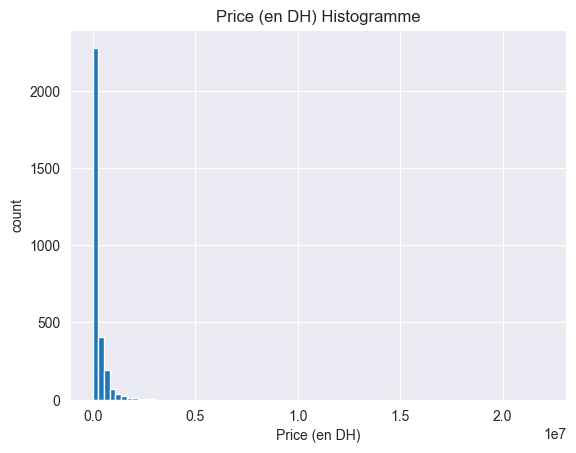

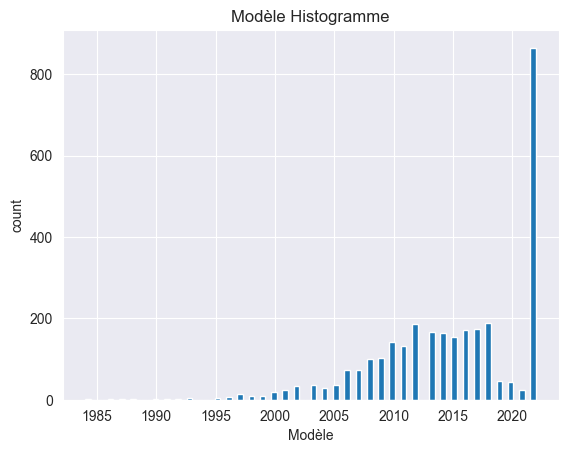

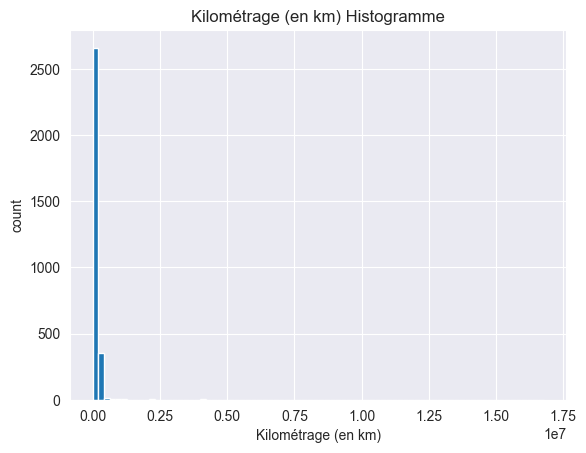

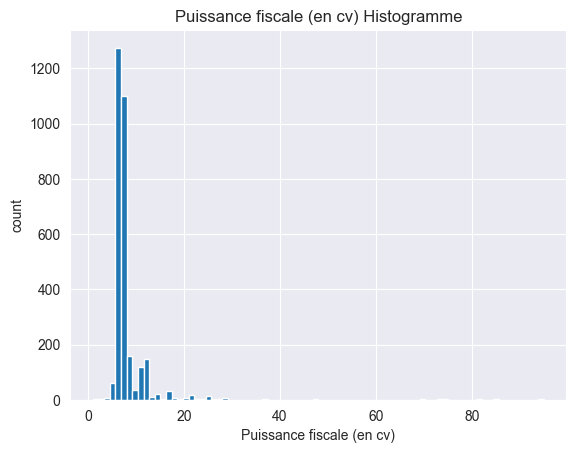

In [43]:
#histogrames de distribusion
sns.set_style('darkgrid') 
V=["Price (en DH)","Modèle","Kilométrage (en km)","Puissance fiscale (en cv)"]
for x in V:
    plt.hist(cars_data[x], bins=80)
    plt.title(x+' Histogramme')
    plt.xlabel(x)
    plt.ylabel("count")
    plt.show()    



C:\Users\hp\AppData\Local\Temp\ipykernel_27576\3489006696.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(cars_data["Price (en DH)"], bins=150, ax=axes[0,0])
C:\Users\hp\AppData\Local\Temp\ipykernel_27576\3489006696.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(cars_data["M

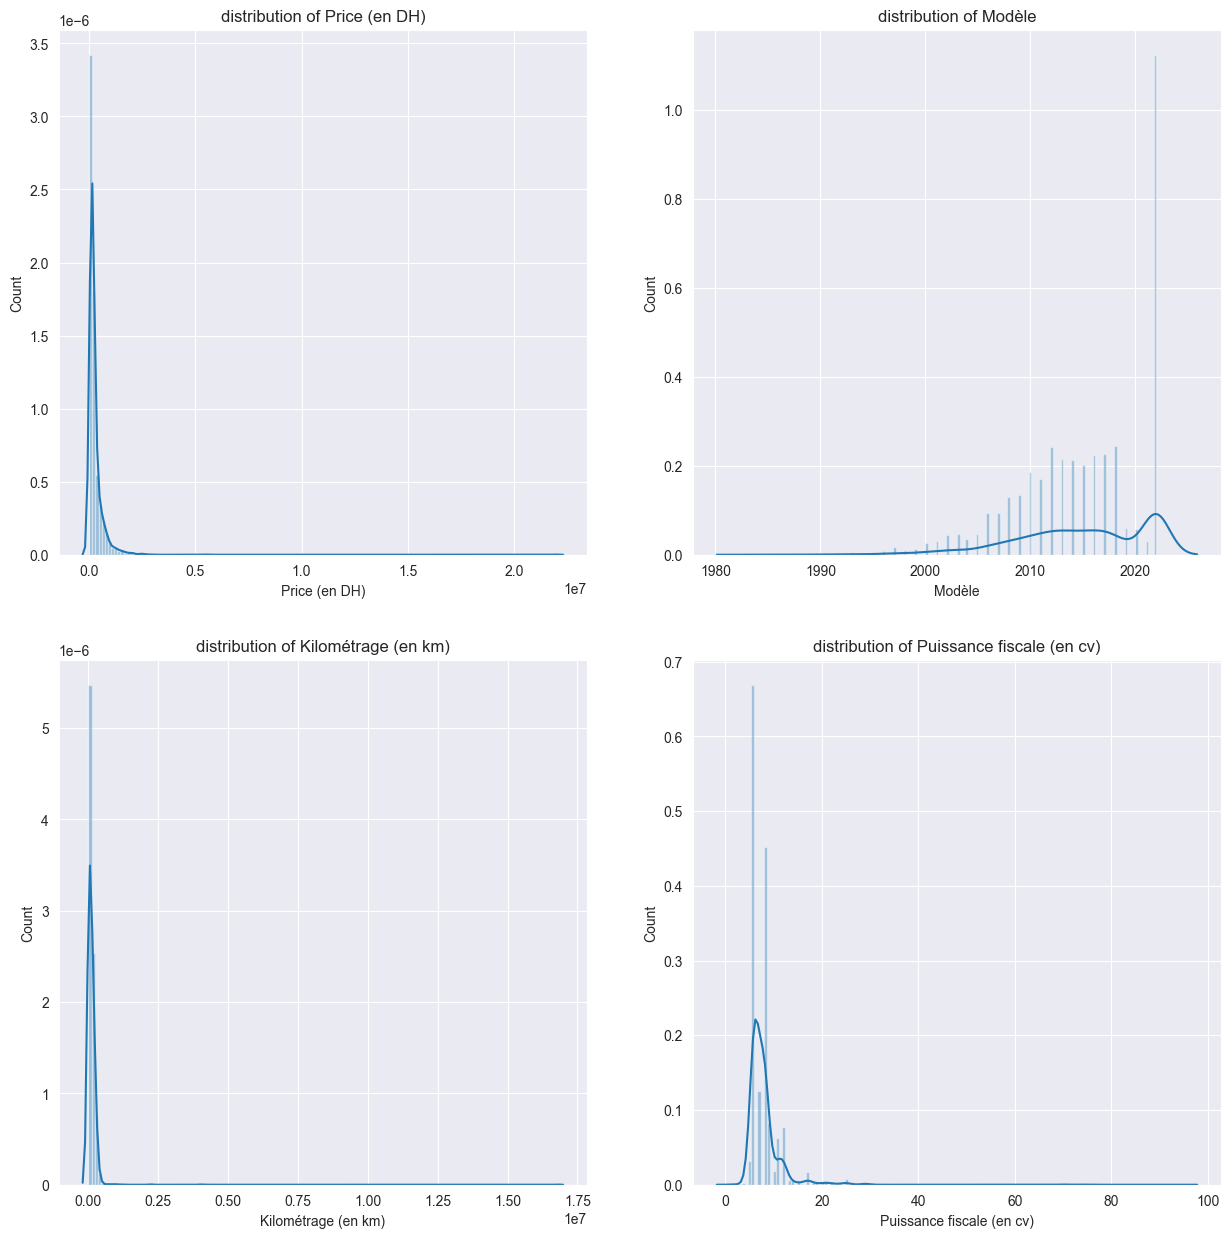

In [44]:
# Histogramme 
# Tracé de la distribution de chacune des variables numériques.

f, axes = plt.subplots(2,2,figsize=(15,15))  

plot1=sns.distplot(cars_data["Price (en DH)"], bins=150, ax=axes[0,0])
plot1.set(title=f'distribution of Price (en DH)', xlabel=f"Price (en DH)", ylabel='Count')

plot2=sns.distplot(cars_data["Modèle"], bins=150, ax=axes[0,1])
plot2.set(title=f'distribution of Modèle', xlabel=f"Modèle", ylabel='Count')

plot3=sns.distplot(cars_data["Kilométrage (en km)"], bins=150, ax=axes[1,0])
plot3.set(title=f'distribution of Kilométrage (en km)', xlabel=f"Kilométrage (en km)", ylabel='Count')

plot4=sns.distplot(cars_data["Puissance fiscale (en cv)"], bins=150, ax=axes[1,1])
plot4.set(title=f'distribution of Puissance fiscale (en cv)', xlabel=f"Puissance fiscale (en cv)", ylabel='Count')

plt.show()


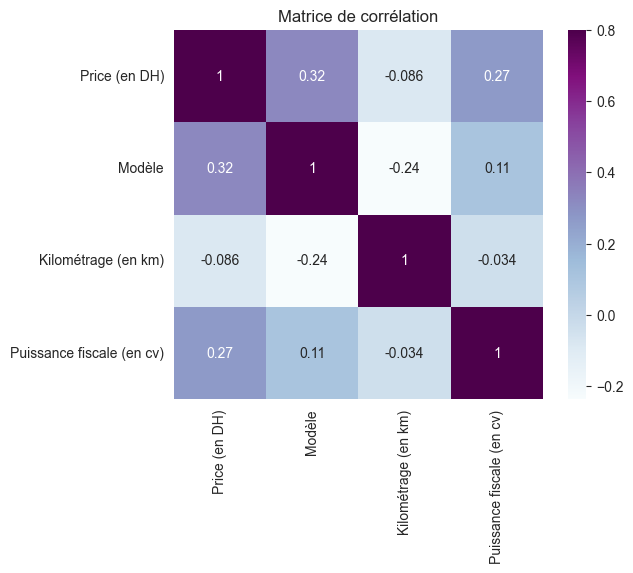

In [45]:
#Matrice de corrélation
matrix = cars_data[V].corr()
f,ax=plt.subplots()
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu', annot=True)
plt.title('Matrice de corrélation')
plt.show()

#### Corrélation entre les variables
  * Les variables `Price (en DH)` et `Kilométrage (en km)` présentent une `forte corrélation`.
  * Les variables `Price (en DH)` et `Modèle` présentent une `forte corrélation`.
  * Les variables `Price (en DH)` et `Puissance fiscale (en cv)` présentent une `forte corrélation`.

###### Variation du prix en fonction des differentes paramètres

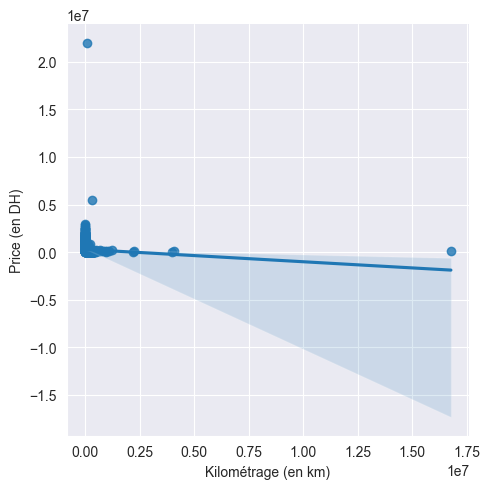

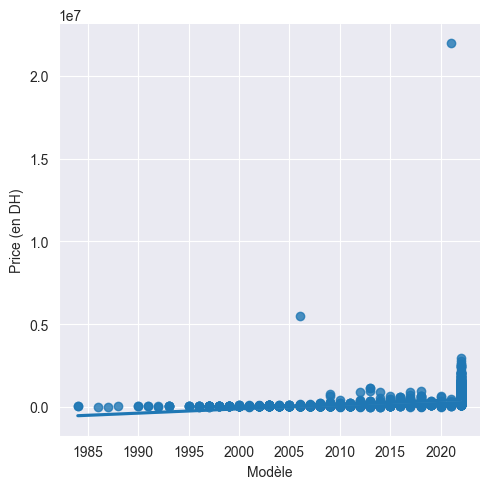

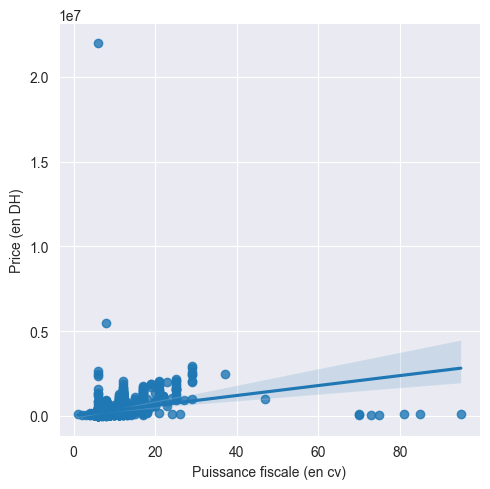

In [46]:
# Pour x='Vitesse maxi.' et y='Cylindrée'
sns.lmplot(x="Kilométrage (en km)",y="Price (en DH)",data=cars_data)
sns.lmplot(x="Modèle",y="Price (en DH)",data=cars_data)
sns.lmplot(x="Puissance fiscale (en cv)",y="Price (en DH)",data=cars_data)


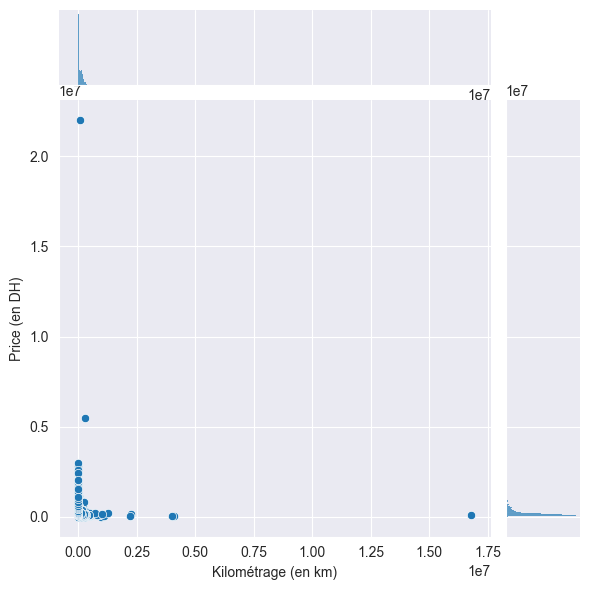

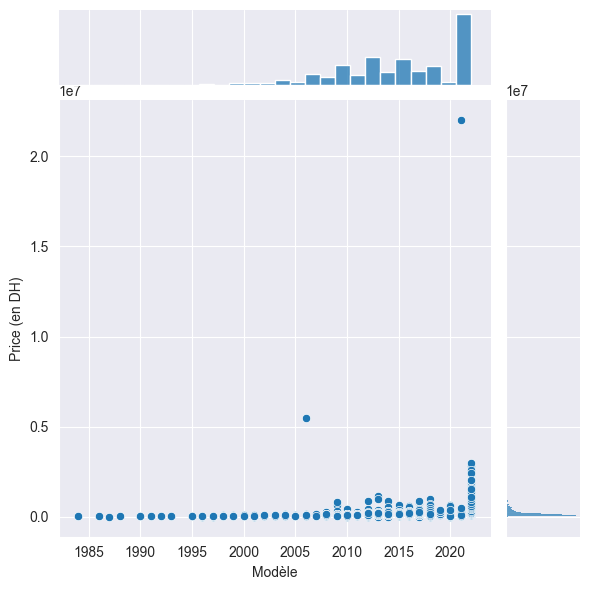

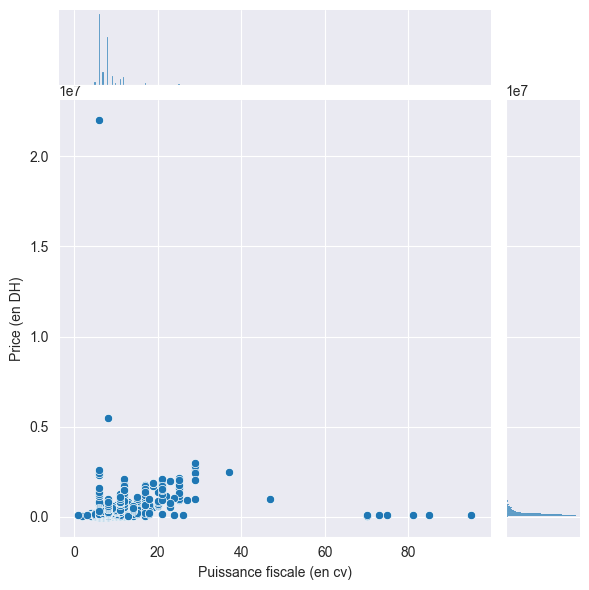

In [47]:
'''
Visualisation en utilisant la méthode jointplot de Seaborn pour déterminer la corrélation
entre deux variables x et y et la distribution de 
chaque variable.
'''

# Pour x='Kilométrage (en km)' et y='Price (en DH)'
sns.jointplot(data=cars_data, x="Kilométrage (en km)",y="Price (en DH)") 

# Pour x='Modèle', y='Price (en DH)'
sns.jointplot(data=cars_data,x="Modèle",y="Price (en DH)") 

# Pour x='Puissance fiscale (en cv)', y='Price (en DH)'
sns.jointplot(data=cars_data, x="Puissance fiscale (en cv)",y="Price (en DH)") 

### `Les variables catégoriques`

In [48]:
### Categorical variables
categorical_variables=cars_data.select_dtypes("object").columns
cars_data[categorical_variables].head()

,Brand,Model,Version,Main,Carburant,Transmision,Couleur extérieure,Etat du véhicule,Climatisation,Vitres électriques,...,Bluetooth,Jantes aluminium,Volant cuir,Feux de jour,Barres de toit,Toit,Airbags,ABS,ESP,Antipatinage
0,MERCEDES,Classe C 2014,220 d,Seconde,Diesel,Automatique,Gris foncé,Très bon,auto. Bi-zone,Electrique AV/AR,...,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui
1,MERCEDES,Classe C 2003,220 CDI,Seconde,Diesel,Manuelle,Noir,Très bon,auto.,Electrique AV/AR,...,oui,oui,non,oui,non,Rigide,oui,oui,oui,oui
2,MERCEDES,Classe B 2013,180 d Urban,Seconde,Diesel,Manuelle,Noir,Comme neuve,manuelle,Electrique AV/AR,...,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui
3,MERCEDES,Classe E 2006,Autre version,Seconde,Diesel,Automatique,Gris clair,Comme neuve,auto. Bi-zone,Electrique AV/AR,...,oui,oui,non,oui,oui,Rigide,oui,oui,oui,oui
4,MERCEDES,CLA Coupé 2014,220 CDI,Seconde,Diesel,Automatique,Blanc cassé,Excellent,auto.,Electrique AV/AR,...,oui,oui,non,oui,non,Panoramique,oui,oui,oui,oui


##### * Utilisation des graphiques à barres pour afficher le nombre de valeurs uniques pour quelques features categoriques du jeu de données.

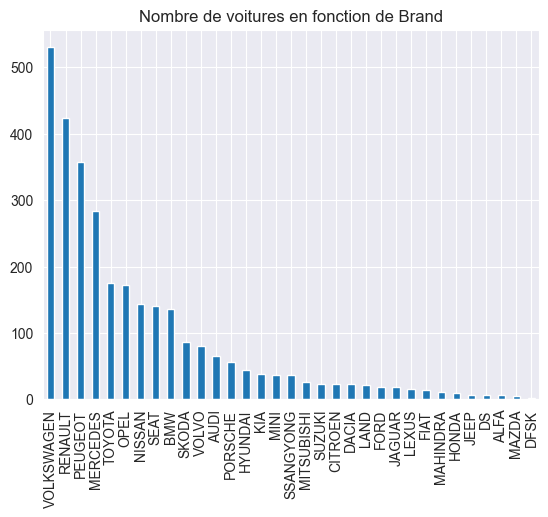

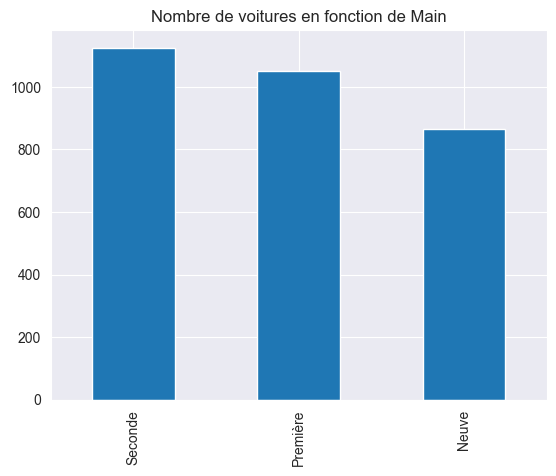

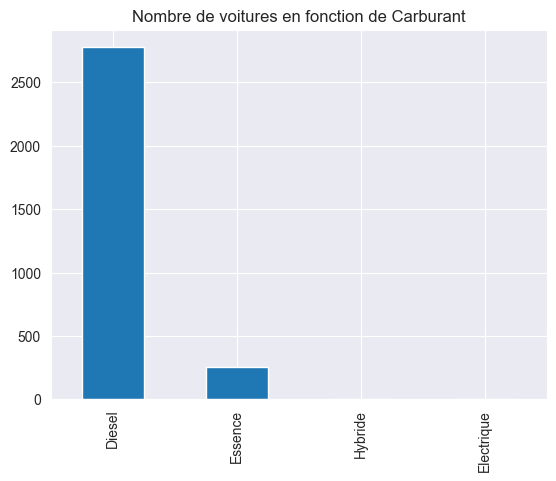

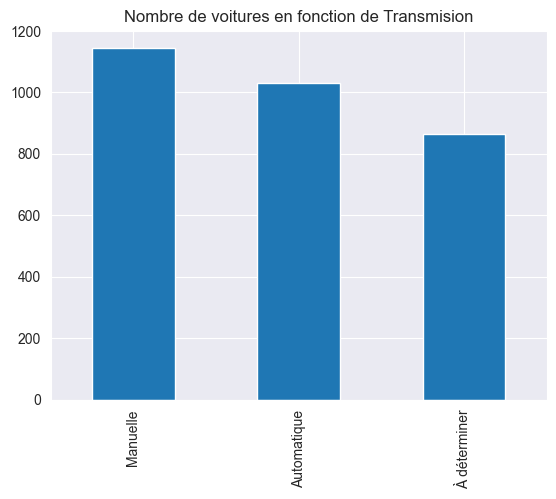

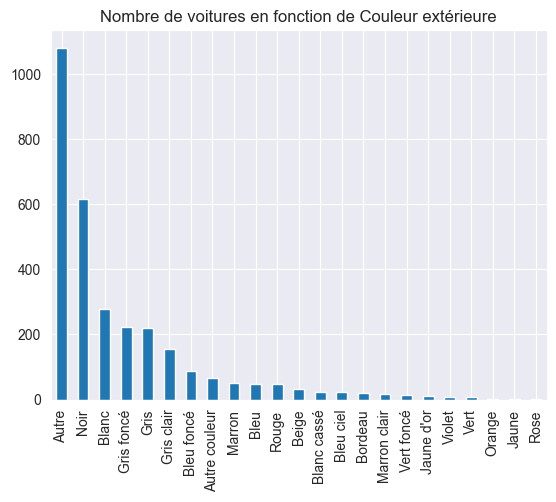

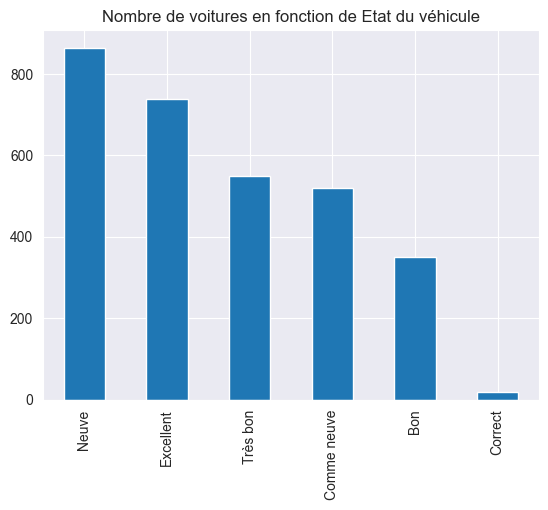

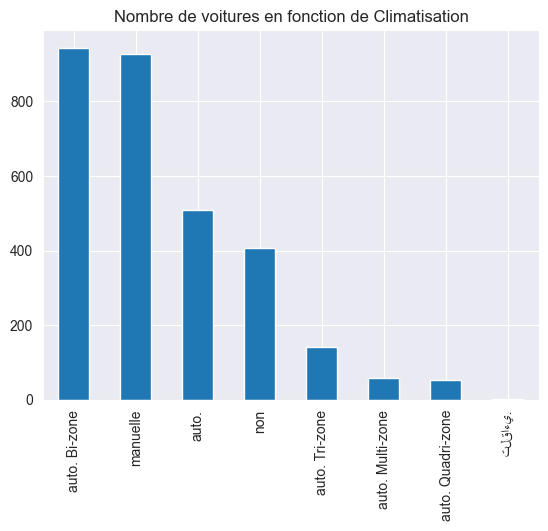

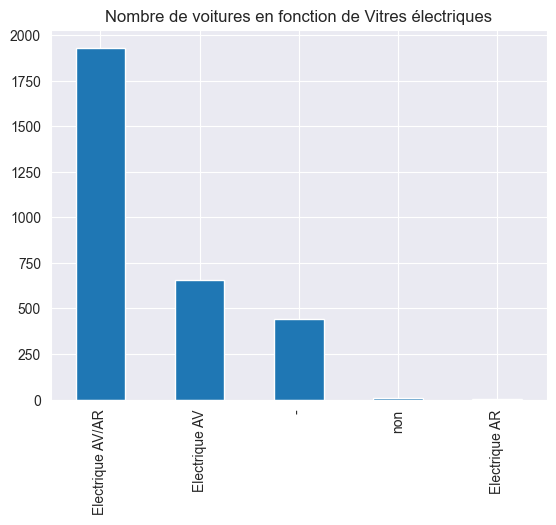

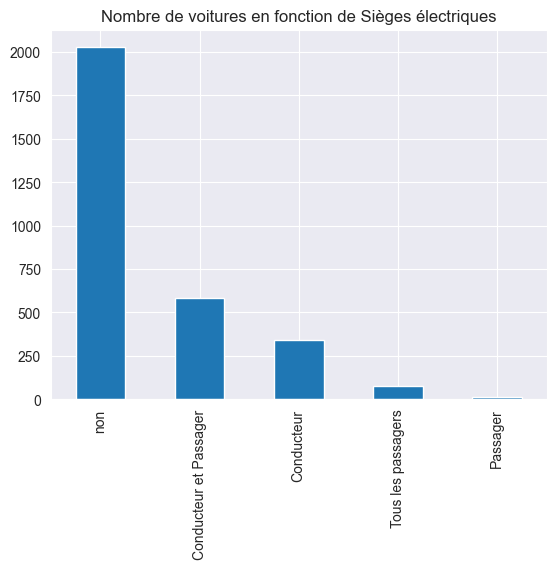

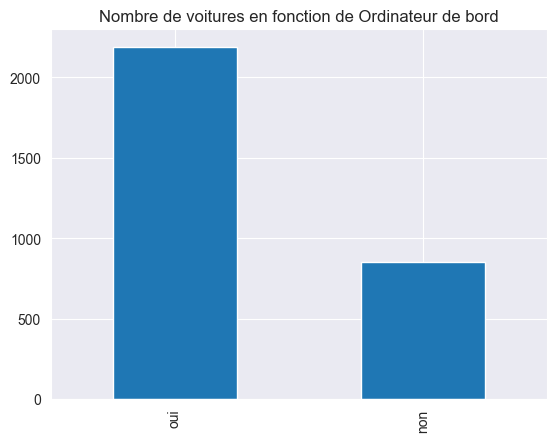

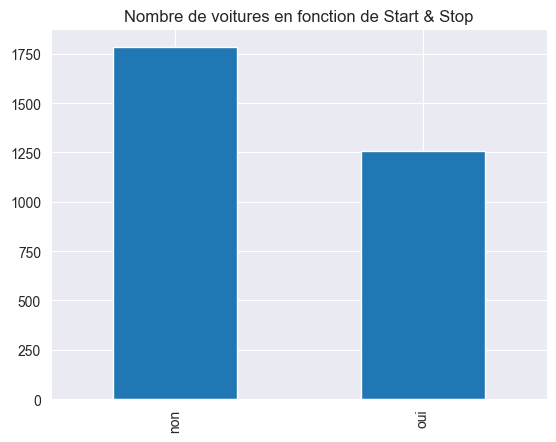

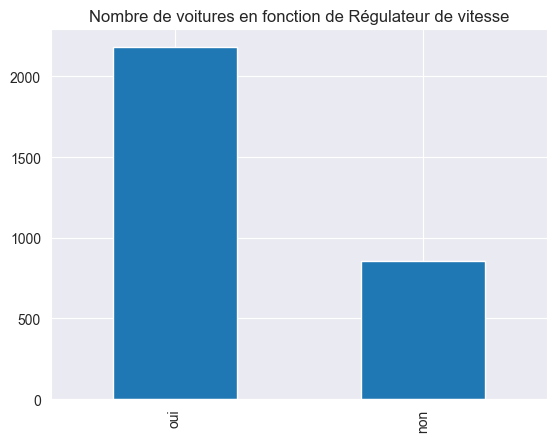

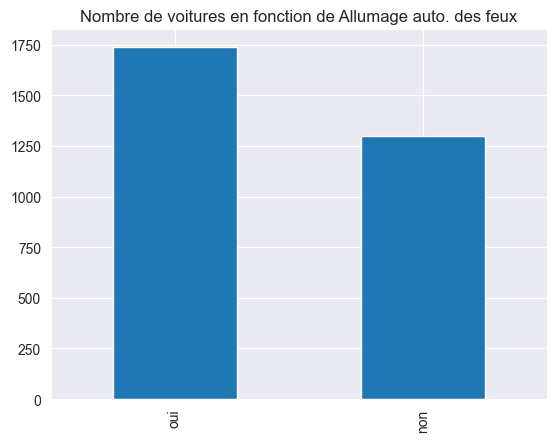

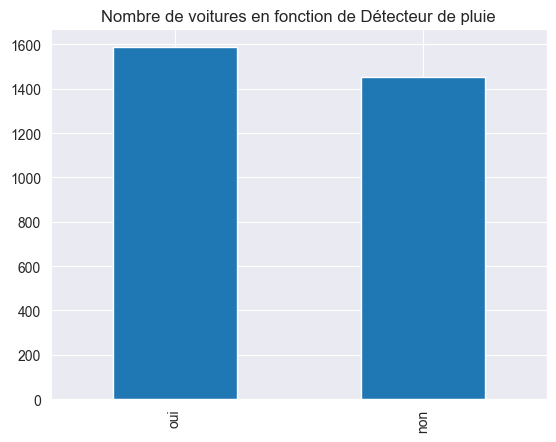

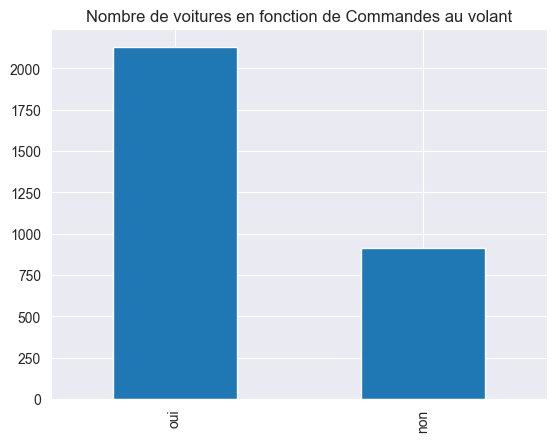

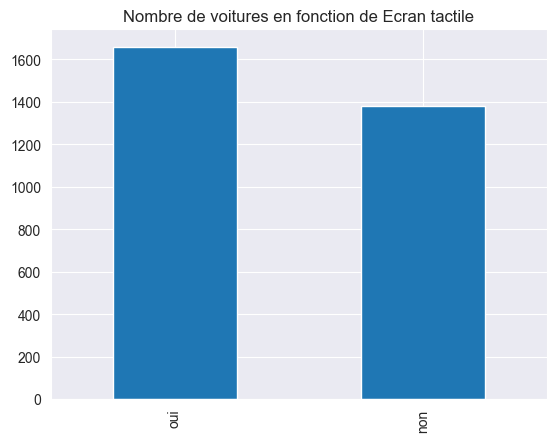

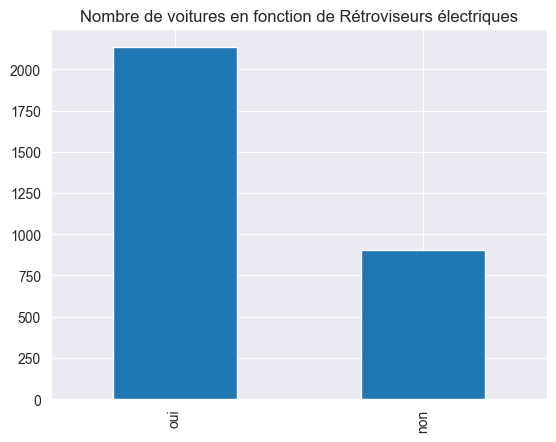

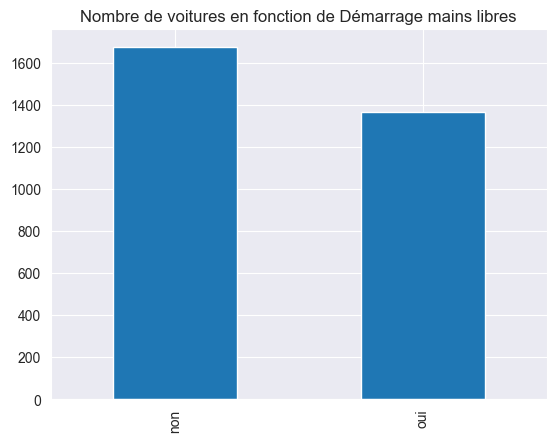

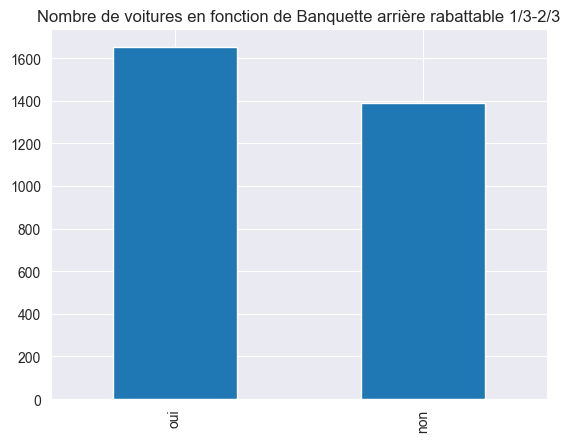

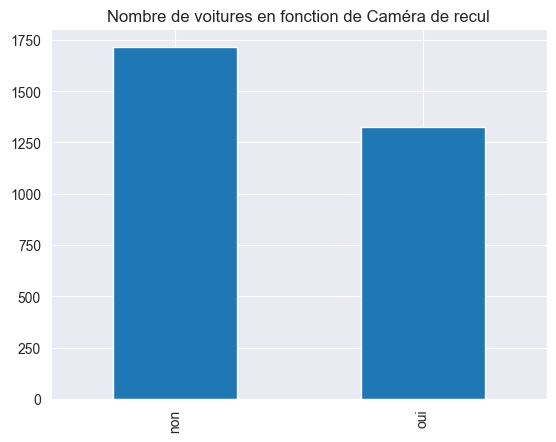

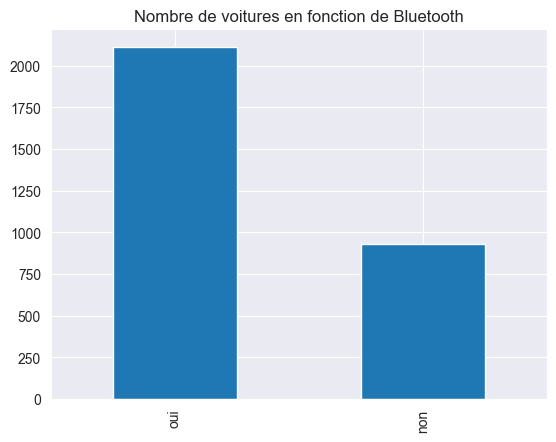

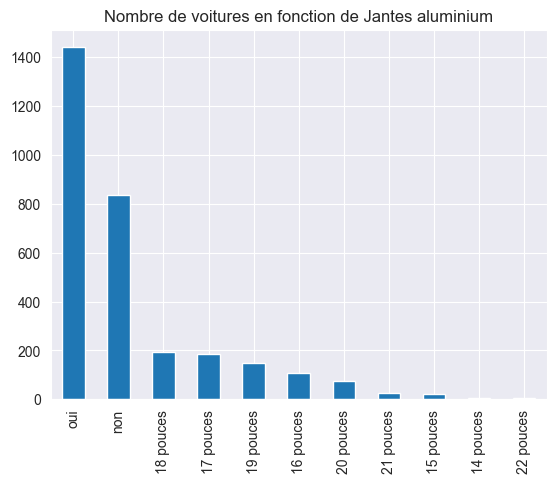

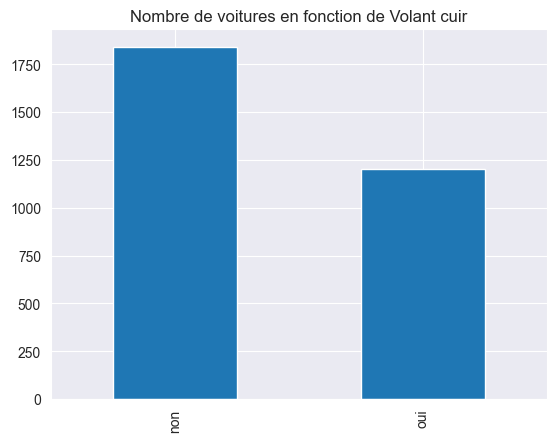

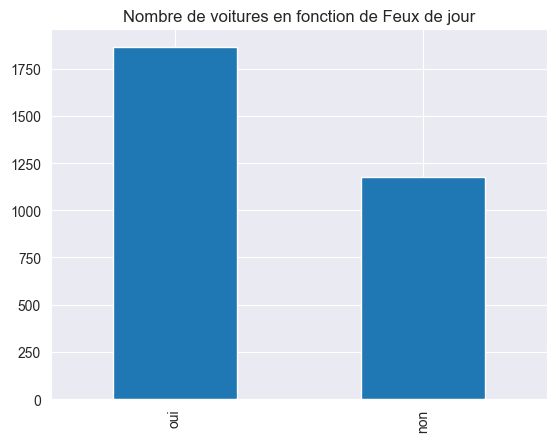

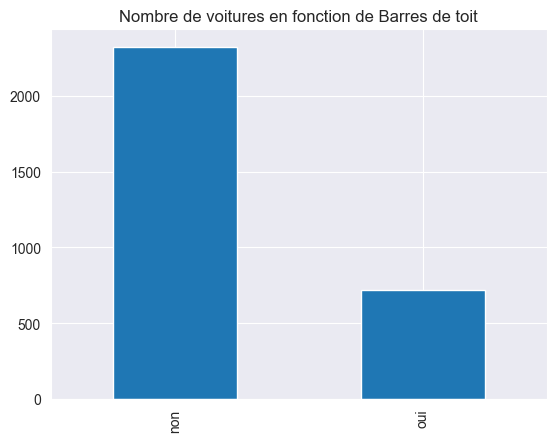

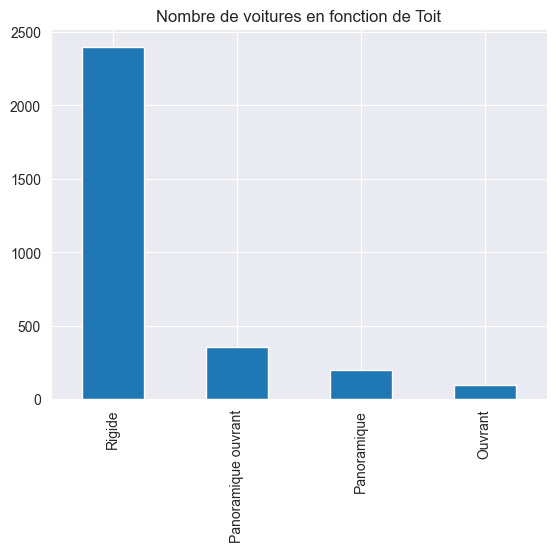

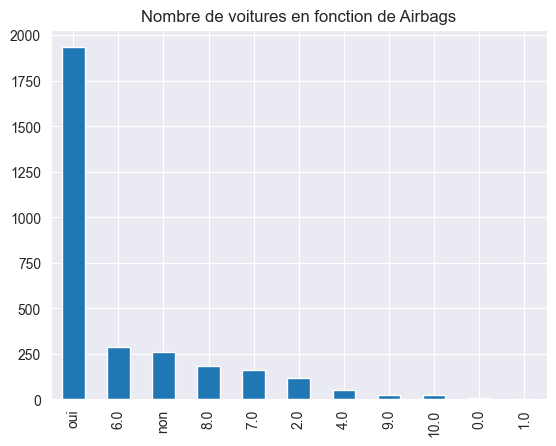

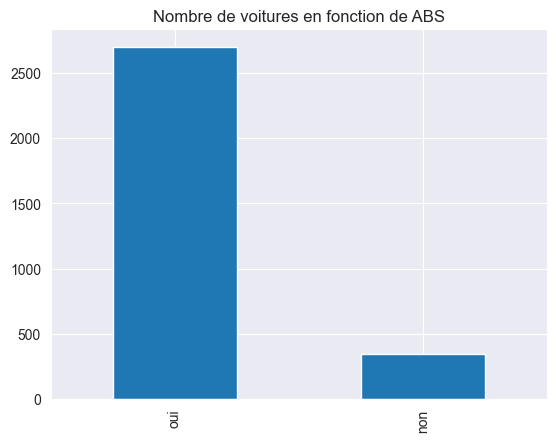

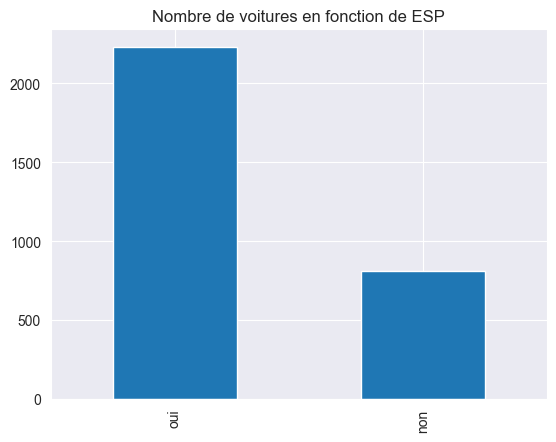

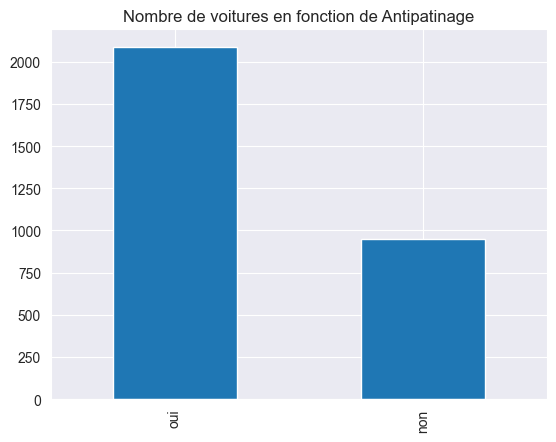

In [49]:
for x in categorical_variables:
    if len(cars_data[x].unique())<=100 :
        cars_data[x].value_counts().plot.bar(title = "Nombre de voitures en fonction de "+x)
        plt.show()

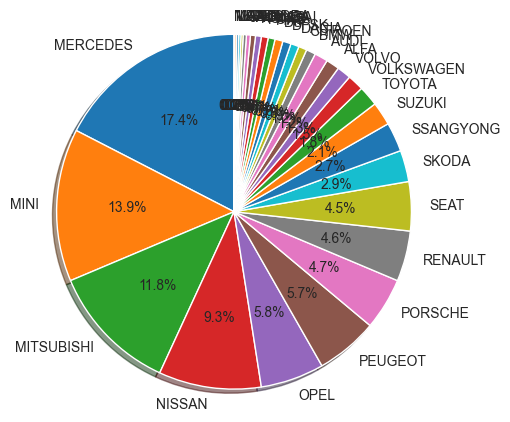

In [55]:


brands = cars_data['Brand'].unique()

C = cars_data['Brand'].value_counts()
count=[]
for i in range(len(C)):
    count.append(C[i])

plt.pie(count, labels = brands,
        startangle=90, shadow = True,
        radius = 1.2, autopct = '%1.1f%%')

# plt.legend()
plt.show()

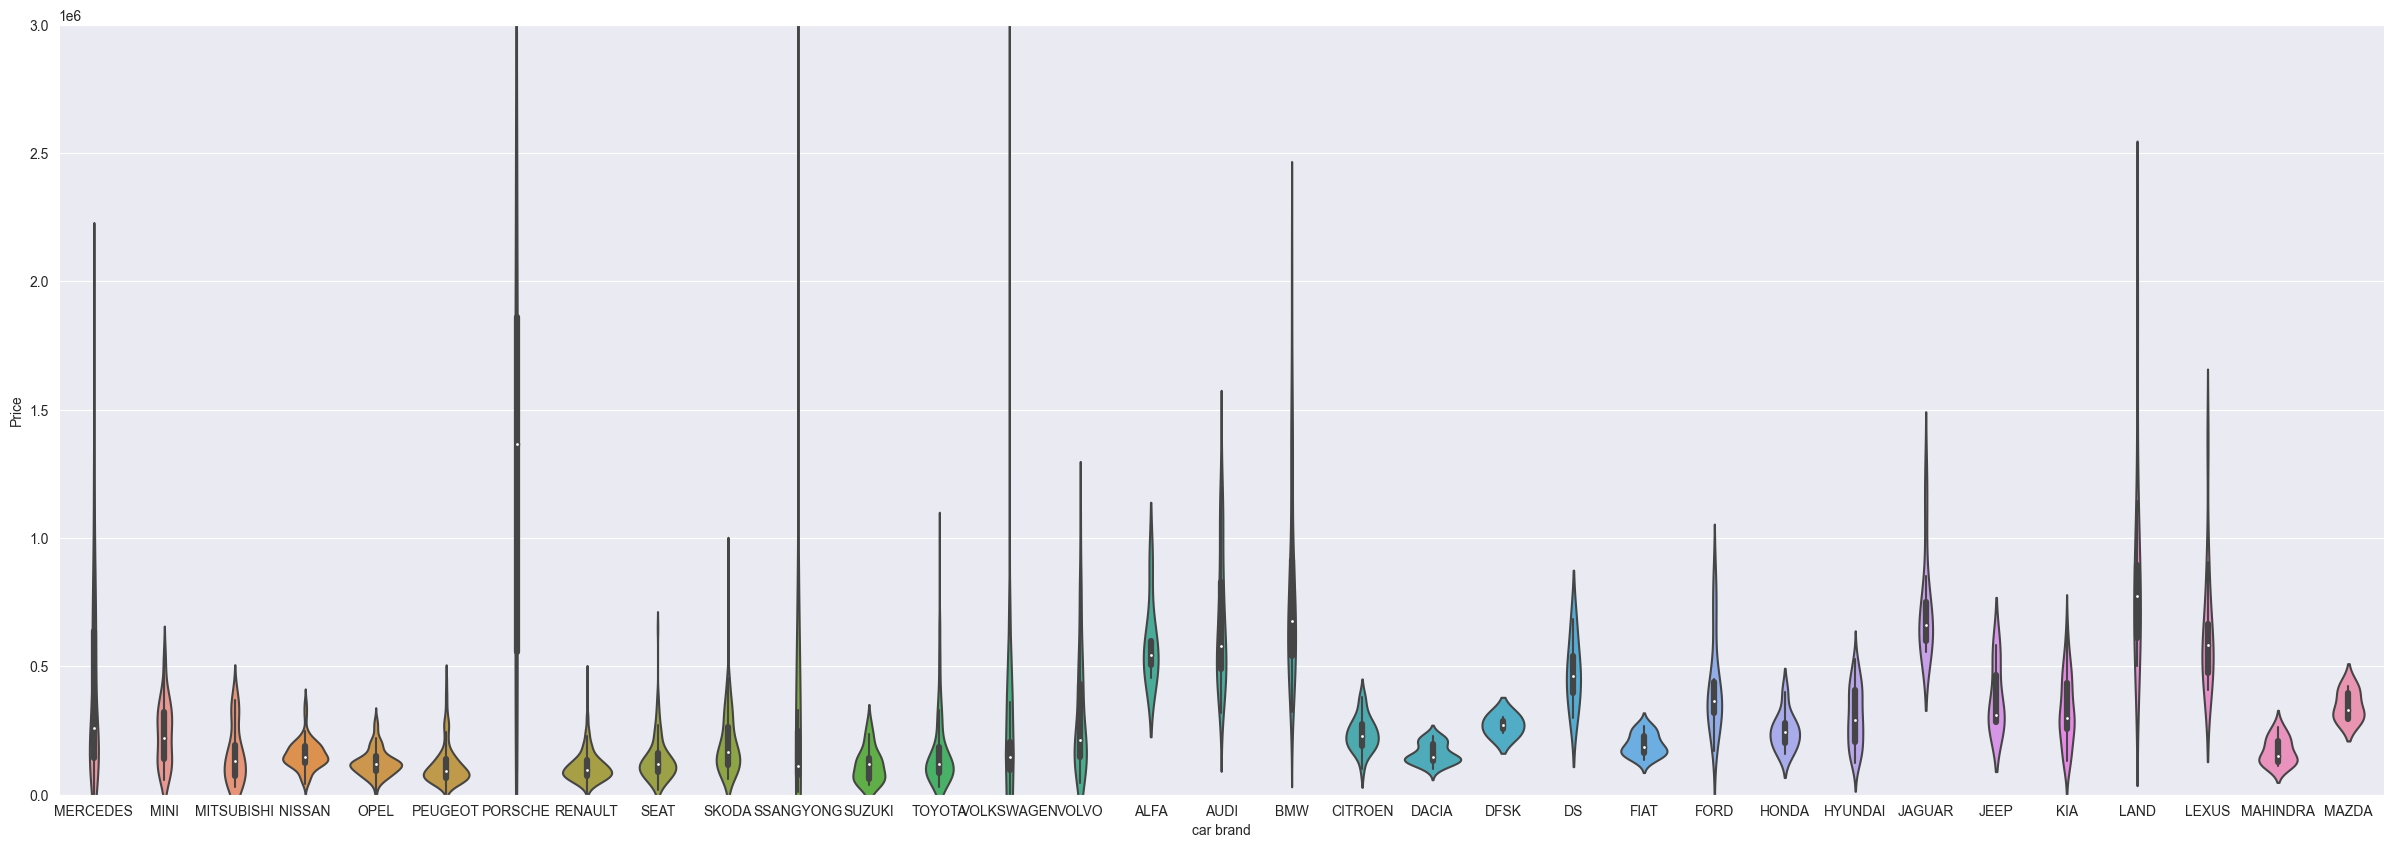

In [56]:
plt.figure(figsize=(30, 10))
sns.violinplot(data= cars_data, x="Brand" , y="Price (en DH)") 
plt.ylim(0, 0.3*1e7)
plt.xlabel('car brand')
plt.ylabel('Price')
plt.show()

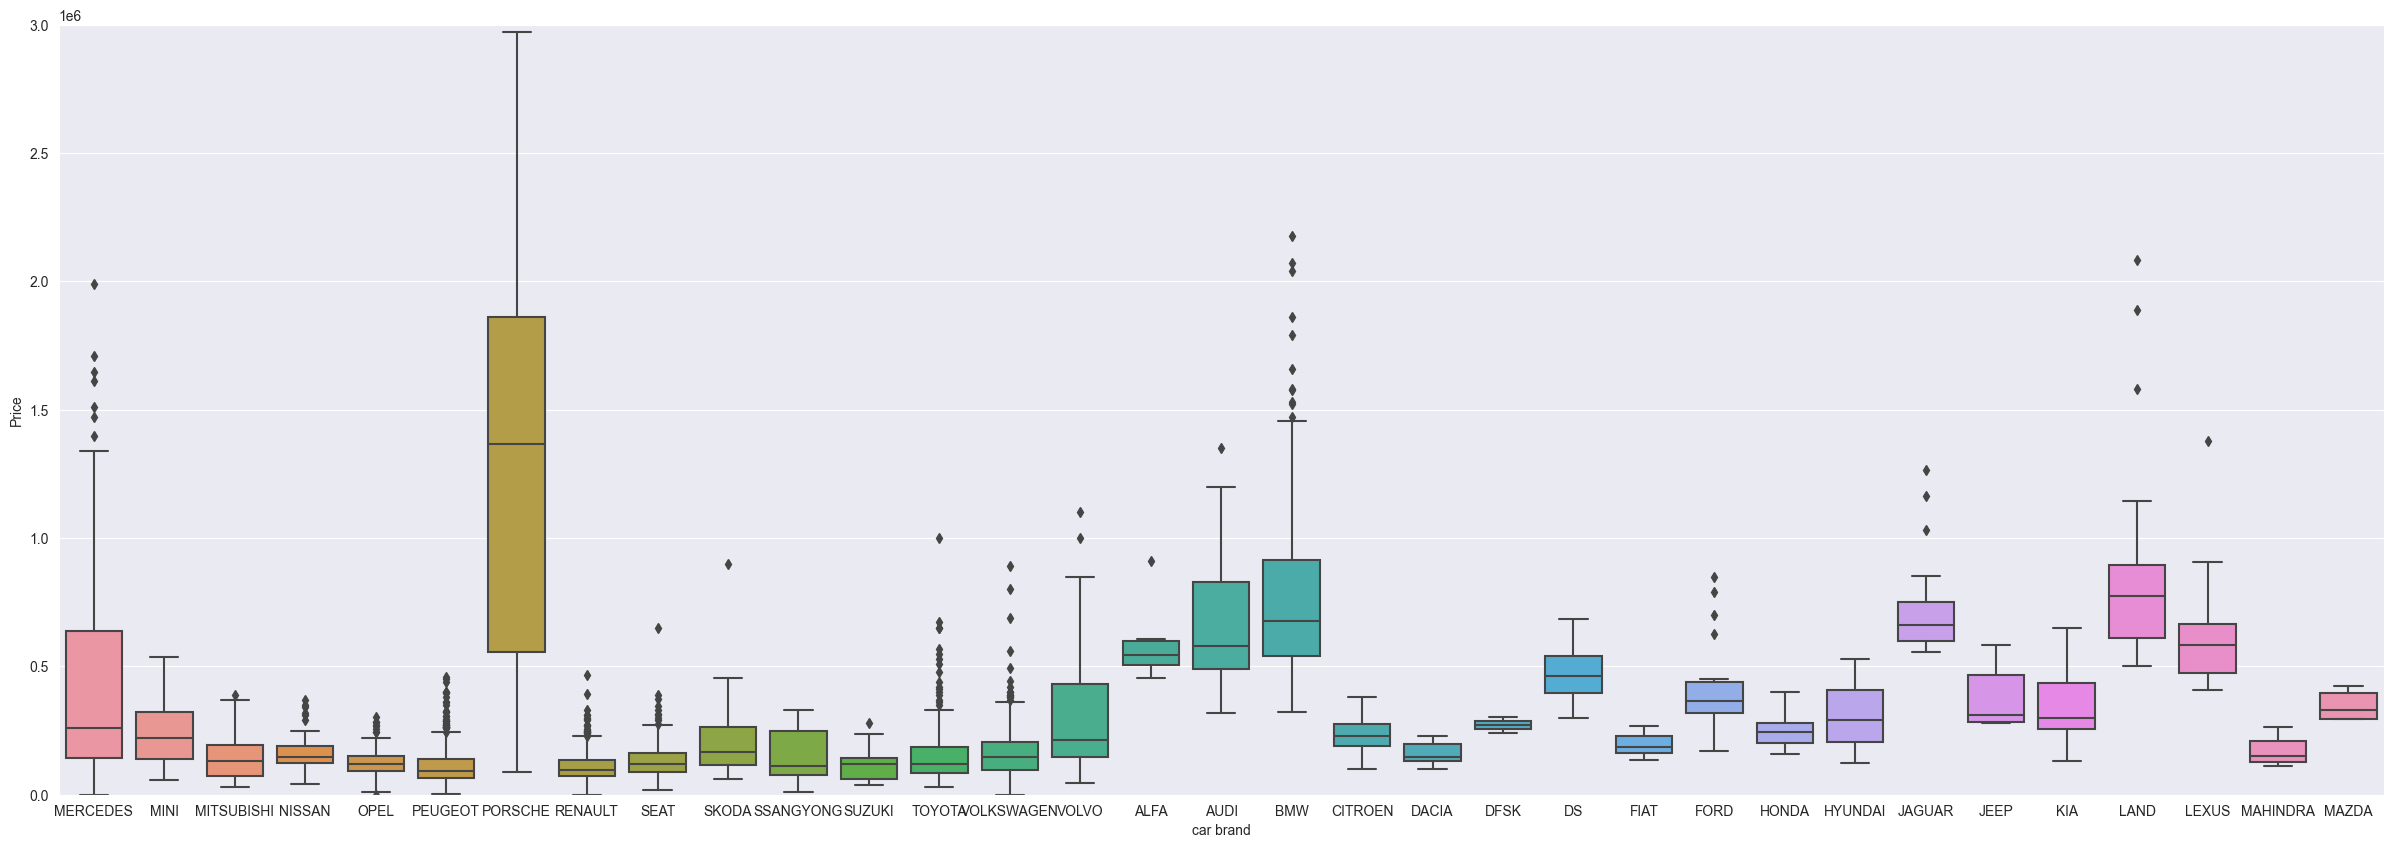

In [57]:
plt.figure(figsize=(30, 10))
sns.boxplot(data= cars_data, x="Brand" , y="Price (en DH)") 
plt.ylim(0, 0.3*1e7)
plt.xlabel('car brand',)
plt.ylabel('Price',)
plt.show()

# Part 3 : Prediction

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import  f_regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

***We are going to use the cleared dataset***

In [59]:
data = pd.read_csv('cleaned_data.csv')

In [60]:
data.head()

,Brand,Model,Version,Price (en DH),Modèle,Main,Kilométrage (en km),Carburant,Transmision,Puissance fiscale (en cv),...,Bluetooth,Jantes aluminium,Volant cuir,Feux de jour,Barres de toit,Toit,Airbags,ABS,ESP,Antipatinage
0,MERCEDES,Classe C 2014,220 d,228000.0,2014,Seconde,144500.0,Diesel,Automatique,8.0,...,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui
1,MERCEDES,Classe C 2003,220 CDI,79000.0,2003,Seconde,350000.0,Diesel,Manuelle,8.0,...,oui,oui,non,oui,non,Rigide,oui,oui,oui,oui
2,MERCEDES,Classe B 2013,180 d Urban,150000.0,2013,Seconde,144000.0,Diesel,Manuelle,8.0,...,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui
3,MERCEDES,Classe E 2006,Autre version,135000.0,2006,Seconde,248000.0,Diesel,Automatique,9.0,...,oui,oui,non,oui,oui,Rigide,oui,oui,oui,oui
4,MERCEDES,CLA Coupé 2014,220 CDI,240000.0,2014,Seconde,103000.0,Diesel,Automatique,9.0,...,oui,oui,non,oui,non,Panoramique,oui,oui,oui,oui


***We can clearly see that not all the features are numerical***

***So we are obliged to use only the numerical features or convert all the features to numerical values using label encoding***

In [61]:
data.columns

Index(['Brand', 'Model', 'Version', 'Price (en DH)', 'Modèle', 'Main',
       'Kilométrage (en km)', 'Carburant', 'Transmision',
       'Puissance fiscale (en cv)', 'Couleur extérieure', 'Etat du véhicule',
       'Climatisation', 'Vitres électriques', 'Sièges électriques',
       'Ordinateur de bord', 'Start & Stop', 'Régulateur de vitesse',
       'Allumage auto. des feux', 'Détecteur de pluie', 'Commandes au volant',
       'Ecran tactile', 'Rétroviseurs électriques', 'Démarrage mains libres',
       'Banquette arrière rabattable 1/3-2/3', 'Caméra de recul', 'Bluetooth',
       'Jantes aluminium', 'Volant cuir', 'Feux de jour', 'Barres de toit',
       'Toit', 'Airbags', 'ABS', 'ESP', 'Antipatinage'],
      dtype='object')

In [62]:
columns=['Brand', 'Model', 'Version', 'Price (en DH)', 'Modèle', 'Main',
       'Kilométrage (en km)', 'Carburant', 'Transmision',
       'Puissance fiscale (en cv)', 'Couleur extérieure', 'Etat du véhicule',
       'Climatisation', 'Vitres électriques', 'Sièges électriques',
       'Ordinateur de bord', 'Start & Stop', 'Régulateur de vitesse',
       'Allumage auto. des feux', 'Détecteur de pluie', 'Commandes au volant',
       'Ecran tactile', 'Rétroviseurs électriques', 'Démarrage mains libres',
       'Banquette arrière rabattable 1/3-2/3', 'Caméra de recul', 'Bluetooth',
       'Jantes aluminium', 'Volant cuir', 'Feux de jour', 'Barres de toit',
       'Toit', 'Airbags', 'ABS', 'ESP', 'Antipatinage']

In [63]:
from sklearn.preprocessing import LabelEncoder

**we will go through all the columns to convert them to numerical values**

In [64]:
for column_name in columns:
    # create an instance of LabelEncoder
    le = LabelEncoder()
    # fit and transform the column containing categorical values
    data[column_name] = le.fit_transform(data[column_name])

***Let's take a look at our new dataset***

In [65]:
data

,Brand,Model,Version,Price (en DH),Modèle,Main,Kilométrage (en km),Carburant,Transmision,Puissance fiscale (en cv),...,Bluetooth,Jantes aluminium,Volant cuir,Feux de jour,Barres de toit,Toit,Airbags,ABS,ESP,Antipatinage
0,18,329,639,278,27,2,393,0,0,7,...,1,10,1,1,0,3,10,1,1,1
1,18,318,634,72,16,2,601,0,1,7,...,1,10,0,1,0,3,10,1,1,1
2,18,308,406,169,26,2,392,0,1,7,...,1,10,1,1,0,3,10,1,1,1
3,18,341,704,145,19,2,538,0,0,8,...,1,10,0,1,1,3,10,1,1,1
4,18,248,634,290,27,2,303,0,0,8,...,1,10,0,1,0,1,10,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,32,1099,704,589,35,0,0,0,2,7,...,1,5,1,1,1,3,6,1,1,1
3036,32,1099,704,637,35,0,0,0,2,7,...,1,6,1,1,1,2,6,1,1,1
3037,32,1099,704,679,35,0,0,0,2,7,...,1,6,1,1,1,2,6,1,1,1
3038,32,1099,704,715,35,0,0,0,2,10,...,1,6,1,1,1,2,6,1,1,1


**We extract the values of all the columns of the database, with the exception of the Price column, and we store it in a variable X**

**The price column will be stored in another variable y:**

In [66]:
y = data['Price (en DH)']
X = data.drop(['Price (en DH)'],axis=1)

***Split the dataset into training and testing sets***

In [67]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3,random_state =2)

***We set up our model (which in this case is the linear regression algorithm)*** 

In [68]:
reg = LinearRegression()

In [69]:
reg.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred = reg.predict(X_test)

***We define the performance metrics***

In [72]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  8377.071369269366


In [73]:
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

R-squared:  0.804003086460116
